In [1]:
# 라이브러리 추가
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# GeoPandas 설치 | http://geopandas.org/
!pip install geopandas

In [3]:
# shapely 설치 | https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely
!pip install D:/GEODATA/Shapely-1.6.4.post2-cp35-cp35m-win_amd64.whl

In [4]:
# Fiona 설치 | https://www.lfd.uci.edu/~gohlke/pythonlibs/#fiona
!pip install D:/GEODATA/Fiona-1.8.6-cp35-cp35m-win_amd64.whl

In [5]:
# GDAL 설치 | https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal
!pip install D:/GEODATA/GDAL-2.4.1-cp35-cp35m-win_amd64.whl

In [6]:
# pyproj 설치 | https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyproj
!pip install D:/GEODATA/pyproj-2.4.2.post1-cp35-cp35m-win_amd64.whl

In [7]:
# 시도경계 Shapefile 열기
# 전세계 국가 및 구역별 공간데이터 제공 'GADM' 소개 | http://blog.daum.net/geoscience/1257
shapefile = 'D:\GEODATA\gadm36_KOR_1.shp'
gdf = gpd.read_file(shapefile)
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,KOR,South Korea,KOR.1_1,Busan,Pusan|Busan Gwang'yeogsi|Pusan-gwangyoksi|Fusan,부산광역시 | 釜山廣域市,Gwangyeoksi,Metropolitan City,None,KR.PU,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,KOR,South Korea,KOR.2_1,Chungcheongbuk-do,Chungchongbuk-Do|Chungcheongbugdo|Ch'ungch'ong...,충청북도 | 忠淸北道,Do,Province,None,KR.GB,"POLYGON ((128.01720 36.20695, 128.01471 36.199..."
2,KOR,South Korea,KOR.3_1,Chungcheongnam-do,Chungchongnam-Do|Ch'ungch'ong-namdo|Chusei Nan...,충청남도 | 忠淸南道,Do,Province,None,KR.GN,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ..."
3,KOR,South Korea,KOR.4_1,Daegu,Taegu|Daegu Gwang'yeogsi|Taegu-gwangyoksi|Taikyu,대구광역시 | 大邱廣域市,Gwangyeoksi,Metropolitan City,None,KR.TG,"POLYGON ((128.68794 35.68165, 128.67543 35.671..."
4,KOR,South Korea,KOR.5_1,Daejeon,Daejeon Gwang'yeogsi|Taejŏn-gwangyŏksi|Taiden,대구광역시 | 大邱廣域市,Gwangyeoksi,Metropolitan City,None,KR.TJ,"POLYGON ((127.38995 36.20081, 127.38162 36.204..."


In [8]:
# 시도경계 Shapefile에서 컬럼 선별하기
gdf = gpd.read_file(shapefile)[['NAME_1', 'geometry']]
gdf.columns = ['name', 'geometry']
gdf.head()

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ..."
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671..."
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204..."


In [9]:
# 컬럼 고유값
gdf['name'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

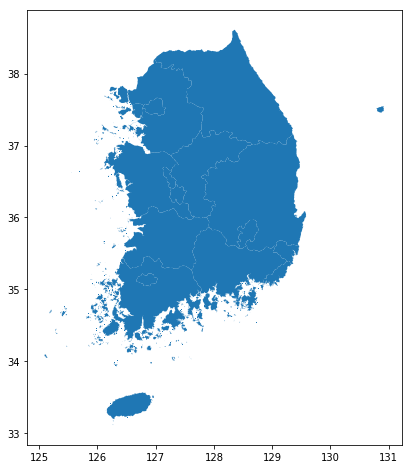

In [10]:
# 공간정보 지도화
gdf.plot(figsize=(16, 8))
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [11]:
# descartes 설치
!pip install descartes

In [12]:
# '동물병원' 데이터프레임 열기
df = pd.read_excel('D:/GEODATA/AML_HOSP.xlsx', sheet_name='AML_HOSP',
                   index_col='인허가일자', parse_dates=True, axis=1)[['NAME', '사업장명']]
df.columns = ['name', '사업장명']

# 컬럼 고유값
df['name'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Seoul', 'Ulsan', nan],
      dtype=object)

In [13]:
# 시도경계별 동물병원 개수
df = df.groupby(df['name']).size().reset_index(name='count')
df = df.sort_values(by='count', ascending=False)
df

,name,count
7,Gyeonggi-do,1664
14,Seoul,1652
9,Gyeongsangnam-do,422
10,Incheon,396
8,Gyeongsangbuk-do,329
0,Busan,325
3,Daegu,283
2,Chungcheongnam-do,255
12,Jeollabuk-do,247
13,Jeollanam-do,217


In [14]:
# 2개 데이터프레임을 병합
gdf = gdf.merge(df, on='name', how='outer').fillna(0)
gdf

,name,geometry,count
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",325.0
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199...",88.0
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ...",255.0
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671...",283.0
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204...",189.0
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ...",178.0
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094...",152.0
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ...",1664.0
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ...",329.0
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ...",422.0


In [15]:
# Shapefile로 저장
gdf.to_file("D:/GEODATA/AML_HOSP_1.shp")